This is the second assignment for DATA201. It is a continuation of the first one, with a more statistical focus.

In order to submit it, please use the http://apps.ecs.vuw.ac.nz/submit/DATA201 and submit only this single jupyter notebook with your code added into it at the appropriate places. 

The due date is Friday 5th April, before midnight. 

-Repeat of the information from last time

Escherichia Coli (E. Coli) is a bacterium found in the intestines of many organisms, including humans. Some strains of it are harmful to humans, and are a major cause of food poisoning. More saliently for New Zealand rivers, it is present in many farm animals, and can be expelled in faecal matter, whereupon it grows aerobically for some time before dying off. This lifetime seems to be between 1 and 3 days depending on conditions. 

The health implications of the presence of E. Coli in water are large, either directly, or as an indicator for the presence of other harmful organisms. In August 2017, the New Zealand Government approved amendments to the National Policy Statement for Freshwater Management, the so-called ‘Clean Water’ package. 

The swimmability criteria place rivers into 5 categories (A–E, also called Blue, Green, Yellow, Orange, and Red, of which the first three are deemed ‘swimmable’), based on the frequency of meeting each of four E. coli thresholds:

|Category |Samples over 540 | Median | 95th Percentile | Samples over 260 |
-----|-----|------|-----|------|
| Blue (A) | < 5% | $\leq$130 | $\leq$540 | <20% |
| Green (B)| 5-10% | $\leq$130 | $\leq$1000 | 20-30% |
| Yellow (C) | 10-20% | $\leq$130 | $\leq$1200 | 20-34% |
| Orange (D) | 20-30% | >130 | >1200 | >34% |
| Red (E) | >30% | >260 | >1200 | >50% |

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from scipy.stats import norm
from scipy.stats import kstest
import datetime as dt
import statsmodels.api as sm
import math
import scipy.stats as stats
import matplotlib.patches as mpatches
%matplotlib inline

Read in the EColiHorizons dataset into the variable df again. You might find it helpful to make a column that is the log of the data. Then decide on the range that $\mu$ and $\sigma$ should take (by looking at the dataset) and plot the four lines on one plot. You can use the pandas where function to get the places where a condition is true, which will help you compute the percentages in the criteria. Then make another plot, and shade in the five parts of the space (categories A-E) in the appropriate colour. The next line might help you; the arguments are a list of x coordinates and then y coordinates in order around the shape. (3 marks)

In [19]:
# scipy.stats.norm
# μ = 0
# σ = 1

In [20]:
# PPF (Percentage Point Function) is inverse CDF
# norm.ppf(0.95)   = 1.6449
# norm.cdf(1.6449) = 0.95

In [152]:
ppf05 = norm.ppf(0.05)   # -1.6448536269514729
ppf10 = norm.ppf(0.1)    # -1.2815515655446004
ppf20 = norm.ppf(0.2)    # -0.8416212335729142
ppf30 = norm.ppf(0.3)    # -0.5244005127080409
ppf34 = norm.ppf(0.34)   # -0.41246312944140473
ppf50 = norm.ppf(0.5)    # 0.0
ppf66 = norm.ppf(0.66)   # 0.41246312944140495
ppf70 = norm.ppf(0.7)    # 0.5244005127080407
ppf80 = norm.ppf(0.8)    # 0.8416212335729143
ppf90 = norm.ppf(0.9)    # 1.2815515655446004
ppf95 = norm.ppf(0.95)   # 1.6448536269514722
ppf100 = norm.ppf(1)     # inf
log130 = np.log(130)
log260 = np.log(260)
log540 = np.log(540)
log1000 = np.log(1000)
log1200 = np.log(1200)

In [22]:
# eg. given 540 @95%, calculate σ-μ relationship using:
# (540 - μ) / 1.6449 = [(μ + σ) - μ] / 1
# so, if the percentage of samples over 540 is <5%:
# (540 - μ) / σ > 1.6449 ==> σ < (540 - μ) / norm.ppf(0.95)
# if the percentage of samples over 260 is <20%:
# (260 - μ) / σ > 0.8416 ==> σ < (260 - μ) / norm.ppf(0.8)
# if the median is <= 130:
# μ <= 130
# if the 95th percentile is <= 540:
# σ < (540 - μ) / norm.ppf(0.95)

In [157]:
# define a function to calculate the intersection given 2 lines
def calculate(k1, b1, k2, b2):
    x = (b2 - b1) / (k1 - k2)
    y = (k1 * b2 - k2 * b1) / (k1 - k2)
    return x, y

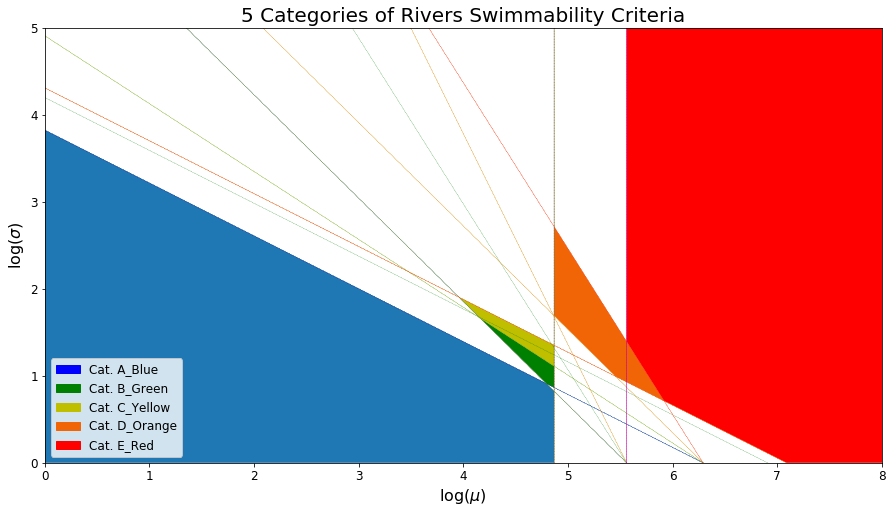

In [193]:
fig, ax = pl.subplots(figsize=(15, 8))

# Category A (Blue)
ax.plot(mu, (log540 - mu) / ppf95,   'b--', linewidth = 0.3)      # threshold: samples over 540
ax.plot(mu, (mu - log130) / 0.00001, 'b--', linewidth = 0.3)      # threshold: median
ax.plot(mu, (log540 - mu) / ppf95,   'b--', linewidth = 0.3)      # threshold: 95th percentile
ax.plot(mu, (log260 - mu) / ppf80,   'b--', linewidth = 0.3)      # threshold: samples over 260
x_intxn_3, y_intxn_3 = calculate((-1 / ppf95), (log540 / ppf95), (-1 / ppf80),  ( log260 / ppf80))
x_intxn_4, y_intxn_4 = calculate((-1 / ppf80), (log260 / ppf80), ( 1 / 0.00001),(-log130 / 0.00001))
fill_A = pl.fill([0, 0, x_intxn_3, x_intxn_4, log130],      # x
                 [0, log540/ppf95, y_intxn_3, y_intxn_4, 0])# y

# Category B (Green)
ax.plot(mu, (log540 - mu)  / ppf95,   'g--', linewidth = 0.3)     # threshold: samples over 540 larger than 5%
ax.plot(mu, (log540 - mu)  / ppf90,   'g--', linewidth = 0.3)     # threshold: samples over 540 less than 10%
ax.plot(mu, (mu - log130)  / 0.00001, 'g--', linewidth = 0.3)     # threshold: median
ax.plot(mu, (log1000 - mu) / ppf95,   'g--', linewidth = 0.3)     # threshold: 95th percentile
ax.plot(mu, (log260 - mu)  / ppf80,   'g--', linewidth = 0.3)     # threshold: samples over 260 larger than 20%
ax.plot(mu, (log260 - mu)  / ppf70,   'g--', linewidth = 0.3)     # threshold: samples over 260 less than 30%
x_intxn_1, y_intxn_1 = calculate((-1 / ppf80), (log260 / ppf80), (-1 / ppf90),   ( log540 / ppf90))
x_intxn_2, y_intxn_2 = calculate((-1 / ppf90), (log540 / ppf90), ( 1 / 0.00001), (-log130 / 0.00001))
x_intxn_3, y_intxn_3 = calculate((-1 / ppf95), (log540 / ppf95), ( 1 / 0.00001), (-log130 / 0.00001))
x_intxn_4, y_intxn_4 = calculate((-1 / ppf95), (log540 / ppf95), (-1 / ppf80),   ( log260 / ppf80))
fill_B = pl.fill([x_intxn_1, x_intxn_2, x_intxn_3, x_intxn_4],      # x
                 [y_intxn_1, y_intxn_2, y_intxn_3, y_intxn_4], 'g') # y

# Category C (Yellow)
ax.plot(mu, (log540 - mu) / ppf90,   'y--', linewidth = 0.3)      # threshold: samples over 540 larger than 10%
ax.plot(mu, (log540 - mu) / ppf80,   'y--', linewidth = 0.3)      # threshold: samples over 540 less than 20%
ax.plot(mu, (mu - log130) / 0.00001, 'y--', linewidth = 0.3)      # threshold: median less than 130
ax.plot(mu, (log1200 - mu) / ppf95,  'y--', linewidth = 0.3)      # threshold: 95th percentile less than 1200
ax.plot(mu, (log260 - mu) / ppf80,   'y--', linewidth = 0.3)      # threshold: samples over 260 larger than 20%
ax.plot(mu, (log260 - mu) / ppf66,   'y--', linewidth = 0.3)      # threshold: samples over 260 less than 30%
x_intxn_1, y_intxn_1 = calculate((-1 / ppf80), (log260  / ppf80), (-1 / ppf95),   ( log1200 / ppf95))
x_intxn_2, y_intxn_2 = calculate((-1 / ppf95), (log1200 / ppf95), ( 1 / 0.00001), (-log130  / 0.00001))
x_intxn_3, y_intxn_3 = calculate((-1 / ppf90), (log540  / ppf90), ( 1 / 0.00001), (-log130  / 0.00001))
x_intxn_4, y_intxn_4 = calculate((-1 / ppf90), (log540  / ppf90), (-1 / ppf80),   ( log260  / ppf80))
fill_C = pl.fill([x_intxn_1, x_intxn_2, x_intxn_3, x_intxn_4],      # x
                 [y_intxn_1, y_intxn_2, y_intxn_3, y_intxn_4], 'y') # y

# Category D (Orange)
ax.plot(mu, (log540 - mu) / ppf80,   '--', color = '#F26507', linewidth = 0.3)      # threshold: samples over 540 larger than 20%
ax.plot(mu, (log540 - mu) / ppf70,   '--', color = '#F26507', linewidth = 0.3)      # threshold: samples over 540 less than 30%
ax.plot(mu, (mu - log130) / 0.00001, '--', color = '#F26507', linewidth = 0.3)      # threshold: median larger than 130
ax.plot(mu, (log1200 - mu) / ppf95,  '--', color = '#F26507', linewidth = 0.3)      # threshold: 95th percentile larger than 1200
ax.plot(mu, (log260 - mu) / ppf66,   '--', color = '#F26507', linewidth = 0.3)      # threshold: samples over 260 larger than 34%
x_intxn_1, y_intxn_1 = calculate((-1 / ppf70),   (log540  / ppf70),   ( 1 / 0.00001), (-log130 / 0.00001))
x_intxn_2, y_intxn_2 = calculate((-1 / ppf95),   (log1200 / ppf95),   (-1 / ppf70),   ( log540 / ppf70))
x_intxn_3, y_intxn_3 = calculate((-1 / ppf95),   (log1200 / ppf95),   (-1 / ppf80),   ( log540 / ppf80))
x_intxn_4, y_intxn_4 = calculate(( 1 / 0.00001), (-log130 / 0.00001), (-1 / ppf80),   ( log540 / ppf80))
fill_D = pl.fill([x_intxn_1, x_intxn_2, x_intxn_3, x_intxn_4],      # x
                 [y_intxn_1, y_intxn_2, y_intxn_3, y_intxn_4], '#F26507') # y

# Category E (Red)
ax.plot(mu, (log540 - mu) / ppf70,           'r--', linewidth = 0.3)      # threshold: samples over 540 larger than 30%
ax.plot(mu, (mu - log260) / 0.00001,         'r--', linewidth = 0.3)      # threshold: median larger than 260
ax.plot(mu, (log1200 - mu) / ppf95,          'r--', linewidth = 0.3)      # threshold: 95th percentile larger than 1200
ax.plot(mu, (log260 - mu) / (ppf50+0.00001), 'm-',  linewidth=0.5)        # threshold: samples over 260 larger than 50%
x_intxn_2, y_intxn_2 = calculate((-1 / ppf70), (log540 / ppf70), ( 1 / 0.00001),(-log260  / 0.00001))
x_intxn_3, y_intxn_3 = calculate((-1 / ppf70), (log540 / ppf70), (-1 / ppf95),  ( log1200 / ppf95))
fill_E = pl.fill([log260, x_intxn_2, x_intxn_3, log1200, 12, 12],      # x
                 [6,      y_intxn_2, y_intxn_3, 0,       0,  6], 'r', label = 'Cat Red(E)') # y

# Visualization
mu = np.arange(0, 8, 0.1)
ax.set_xlim(0, 8)
ax.set_ylim(0, 5)
ax.tick_params(axis = "x", labelsize = 12)
ax.tick_params(axis = "y", labelsize = 12)
ax.set_title('5 Categories of Rivers Swimmability Criteria', fontsize = 20)
ax.set_xlabel('log($\mu$)',    fontsize = 16)
ax.set_ylabel('log($\sigma$)', fontsize = 16)
blue_patch   = mpatches.Patch(color = 'b',       label = 'Cat. A_Blue')
green_patch  = mpatches.Patch(color = 'g',       label = 'Cat. B_Green')
yellow_patch = mpatches.Patch(color = 'y',       label = 'Cat. C_Yellow')
orange_patch = mpatches.Patch(color = '#F26507', label = 'Cat. D_Orange')
red_patch    = mpatches.Patch(color = 'r',       label = 'Cat. E_Red')
ax.legend(handles  = [blue_patch, green_patch, yellow_patch, orange_patch, red_patch], 
          fontsize = "large", loc = 'lower left')

Create two subsets of the data for the two sites from Assignment 1: "Arawhata Drain at Hokio Beach Road" and "Manawatu at u/s PNCC STP".

For each of the two sites:
- Fit a linear regression with log(count) as the outcome variable and with time as the covariate;
- Calculate and plot the residuals;
- Comment on what the residual plot shows;
- Test the residuals for Normality using the Kolmogorov-Smirnov (K-S) test.  

Note: The Kolmogorov-Smirnov test checks how well some data fits a particular distribution. It is implemented in scipy as kstest, which is imported in the line below. 

(3 Marks)

In [82]:
df_EColiHorizons = pd.read_csv('http://sms.victoria.ac.nz/foswiki/pub/Courses/DATA201_2019T1/WebHome/EColiHorizons.csv')

In [3]:
df_EColiHorizons.head()

,Location,Test,Date,Count,Land height,Land type
0,Arawhata Drain at Hokio Beach Road,ECOLI,1/02/06 9:45,430.0,Lowland,Rural
1,Arawhata Drain at Hokio Beach Road,ECOLI,1/03/06 10:10,350.0,Lowland,Rural
2,Arawhata Drain at Hokio Beach Road,ECOLI,22/03/06 11:05,410.0,Lowland,Rural
3,Arawhata Drain at Hokio Beach Road,ECOLI,24/05/06 10:45,230.0,Lowland,Rural
4,Arawhata Drain at Hokio Beach Road,ECOLI,27/06/06 11:20,65.0,Lowland,Rural


In [81]:
df_HBR = df_EColiHorizons[df_EColiHorizons.Location == "Arawhata Drain at Hokio Beach Road"]
df_STP = df_EColiHorizons[df_EColiHorizons.Location == "Manawatu at u/s PNCC STP"]

In [50]:
# for site "Arawhata Drain at Hokio Beach Road"
# fit a linear regression with log(count) as the outcome variable and with time as the covariate
df_HBR.Date    = pd.to_datetime(df_HBR.Date, format = '%d/%m/%y %H:%M')
HBR_date       = df_HBR.Date.copy()
HBR_date_value = HBR_date.map(dt.datetime.toordinal)
HBR_count      = np.log(df_HBR.Count)
HBR_date_const = sm.add_constant(HBR_date_value)
model          = sm.OLS(HBR_count, HBR_date_const)
results        = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     15.00
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           0.000204
Time:                        21:47:24   Log-Likelihood:                -137.56
No. Observations:                  92   AIC:                             279.1
Df Residuals:                      90   BIC:                             284.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -268.3603     70.955     -3.782      0.0

In [78]:
# To calculate the residuals
HBR_pred_count = results.fittedvalues.copy()
HBR_true_count = HBR_count.values.copy()
HBR_residual   = HBR_true_count - HBR_pred_count

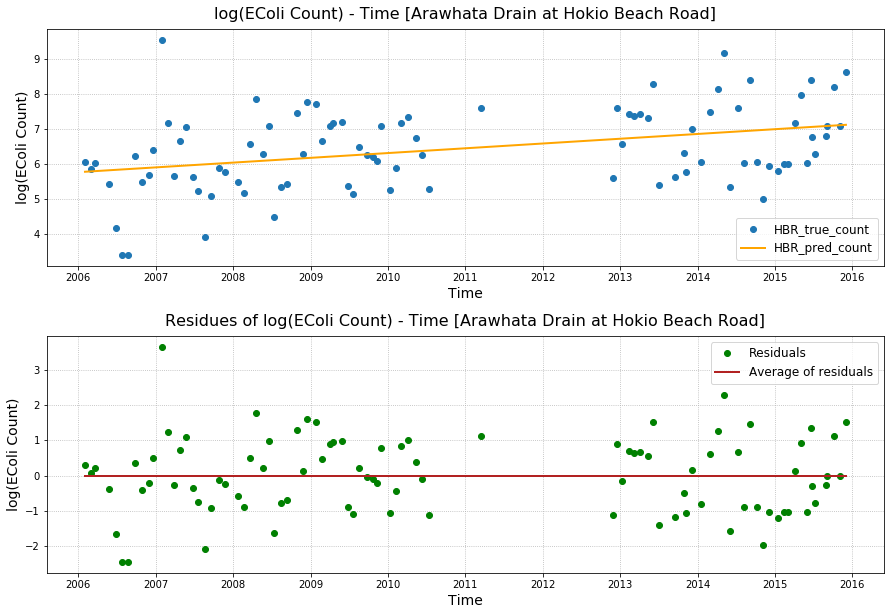

In [117]:
# To plot the linear regression & residuals
fig, ax = pl.subplots(2, 1, figsize = (15, 10)) # create a new figure & set the figure size

ax[0].plot(HBR_date, HBR_true_count, 'o')
ax[0].plot(HBR_date, HBR_pred_count, linewidth = 2, color = 'orange', linestyle = 'solid')  
ax[0].set_xlabel('Time', fontsize = 14) 
ax[0].set_ylabel('log(EColi Count)', fontsize = 14) 
ax[0].set_title('log(EColi Count) - Time [Arawhata Drain at Hokio Beach Road]', fontsize = 16, pad = 10) # pad: offset of the title from the top of the axes
ax[0].xaxis.grid(linestyle = ":")
ax[0].yaxis.grid(which = "both", linestyle = ":")
ax[0].legend(("HBR_true_count", "HBR_pred_count"), loc = 4, fontsize = 'large')

ax[1].plot(HBR_date, HBR_residual, 'o', color = 'g')
ax[1].plot(HBR_date, np.full(92, np.average(HBR_residual)), linewidth = 2, color = 'firebrick', linestyle = 'solid')
ax[1].set_xlabel('Time', fontsize = 14) 
ax[1].set_ylabel('log(EColi Count)', fontsize = 14) 
ax[1].set_title('Residues of log(EColi Count) - Time [Arawhata Drain at Hokio Beach Road]', fontsize = 16, pad = 10) # pad: offset of the title from the top of the axes
ax[1].xaxis.grid(linestyle = ":")
ax[1].yaxis.grid(which = "both", linestyle = ":")
ax[1].legend(("Residuals", "Average of residuals"), fontsize = 'large')

pl.subplots_adjust(hspace = 0.3) # adjust the space between the 2 subplots
pl.show()

In [94]:
# Comment on what the residual plot shows
print("The residual plot shows the differences between the real measured count and the predicted count on each testing date." )
print("The average of the residuals over the residuals is 0 " + "(" + str(np.average(HBR_residual)) + ").")

The residual plot shows the differences between the real measured count and the predicted count on each testing date.
The average of the residuals over the residuals is 0 (8.95708628041061e-14).


KstestResult(statistic=0.08036265616269728, pvalue=0.5783374282490539)
From the plot, the standardised residuals roughly follows a normal(0, 1) distribution.


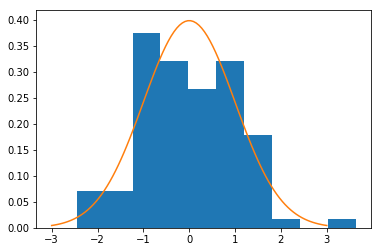

In [149]:
# Test the residuals for Normality using the Kolmogorov-Smirnov (K-S) test.
kstest(HBR_residual, 'norm')
print(kstest(results.resid, 'norm'))
pl.hist(HBR_residual, density = True)  # density = True: the sum of the histograms is normalized to 1
# to print a Standard Normal Distribution for comparison
mu    = 0
var   = 1
sigma = math.sqrt(var)
x     = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
pl.plot(x, stats.norm.pdf(x, mu, sigma))
print("From the plot, the standardised residuals roughly follows a normal(0, 1) distribution.")

For each of the two sites:
- Report and interpret the estimated regression coefficients;
- Give confidence intervals for the coefficients;
- Make a statement about the statistical evidence for improvement, no change or deterioration of the water quality.

(3 Marks)